<a href="https://colab.research.google.com/github/eunsour/Deep-Learning-from-Scratch/blob/main/Chapter%2002/Ch2_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1 퍼셉트론이란?
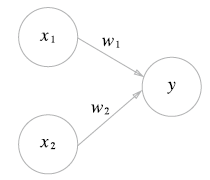
1. 퍼셉트론은 다수의 신호를 입력으로 받아 하나의 신호를 출력한다.
2. 실제 전류와 달리 퍼셉트론 신호는 '흐른다/안 흐른다(1이나 0)'의 두 가지 값을 가질 수 있다.
3. x1, x2는 입력 신호, y는 출력 신호, w1과 w2는 가중치를 뜻한다. 
4. 그림의 원을 **뉴런** 혹은 **노드**라고 부른다.
5. 입력 신호가 뉴런에 보내질 떄는 각각 고유한 **가중치**가 곱해진다.
6. 뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력한다. 
7. 이 책에서는 그 한계를 **임계값**이라 하며, 세타 기호로 나타낸다.



# 2.3 퍼셉트론 구현하기

### 2.3.1 간단한 구현부터

In [1]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [2]:
AND(0, 0) # 0을 출력
AND(1, 0) # 0을 출력
AND(0, 1) # 0을 출력
AND(1, 1) # 1을 출력

1

## 2.3.2 가중치와 편향 도입

In [4]:
import numpy as np
x = np.array([0, 1])      # 입력
w = np.array([0.5, 0.5])  # 가중치
b = -0.7                  # 편향 
w*x

array([0. , 0.5])

In [5]:
np.sum(w*x)

0.5

In [6]:
np.sum(w*x) + b  # 대략 -0.2 (부동소수점 수에 의한 연산 오차)

-0.19999999999999996

## 2.3.3 가중치와 편향 구현하기

In [7]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [8]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) # AND와는 가중치(w와 b)만 다르다.
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [12]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) # AND와는 가중치(w와 b)만 다르다.
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

- AND, NAND, OR는 모두 같은 구조의 퍼셉트론이고, 차이는 가중치 매개변수의 값뿐이다.

# 2.4 퍼셉트론의 한계
- XOR 게이트는 배타적 논리합이라는 논리 회로이다.
- x1과 x2 중 한 곳이 1일 때만 1을 출력한다.
- 지금까지 본 퍼셉트론으로는 XOR 게이트를 구현할 수 없다.

# 2.5 다층 퍼셉트론이 출동한다면
- 퍼셉트론츤 '층을 쌓아' 다층 퍼셉트론을 만들 수 있다.

## 2.5.1 기존 게이트 조합하기
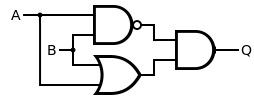
- XOR 게이트를 만드는 방법은 다양하다.
- 그 중 하나는 앞서 만든 AND, NAND, OR 게이트를 조합하는 방법이다.

## 2.5.2 XOR 게이트 구현하기

In [13]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [15]:
print(XOR(0, 0))  # 0을 출력
print(XOR(1, 0))  # 1을 출력
print(XOR(0, 1))  # 1을 출력
print(XOR(1, 1))  # 0을 출력

0
1
1
0


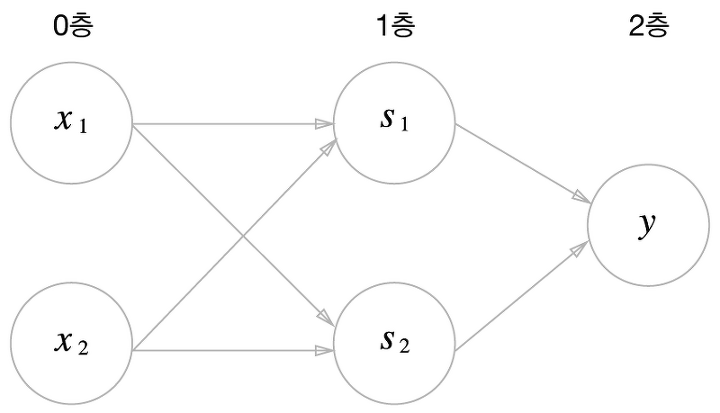
1. 0층의 두 뉴런이 입력 신호를 받아 1층의 뉴런으로 신호를 보낸다. 
2. 1층의 뉴런이 2층으로 뉴런으로 신호를 보내고, 2층의 뉴런은 y를 출력한다.

# 2.7 정리


1.   퍼셉트론은 입출력을 갖춘 알고리즘이다. 입력을 주면 정해진 규칙에 따른 값을 출력한다.
2.   퍼셉트론에서는 가중치와 편향을 매개변수로 설정한다.
3. 퍼셉트론으로 AND, OR 게이트 등의 논리 회로를 표현할 수 있다.
4. XOR 게이트는 단층 퍼셉트론으로는 표현할 수 없다.
5. 2층 퍼셉트론을 이용하면 XOR 게이트를 표현할 수 있다.
6. 단층 퍼셉트론은 직선형 영역만 표현할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 수 있다.
7. 다층 퍼셉트론은 (이론상) 컴퓨터를 표현할 수 있다.

